# An empirical study of industry momentum strategy on Chinese stock market, 2006-2020

## Import Data

In [1]:
# Import packages
import pandas as pd
import numpy as np

In [2]:
# Import Data
data = pd.read_excel(r'Data31.xlsx')

In [3]:
# Dealing with missing value
data.fillna(0,inplace=True)

In [4]:
# Setting initial values
J_value = 12
T_value = 12
weight1 = 1/3
weight2 = 1/3
weight3 = 1/3
weight4 = 1/3
weight5 = 1/3
weight6 = 1/3
charge = 0.0013

## Caculate monthly returns for all industries

In [5]:
# Caculate monthly returns
data.index = pd.to_datetime(data['Date'], errors='coerce')
time_month = data.index.strftime('%Y-%m')
data.index = time_month
data.groupby(data.index)
data_month = data.groupby(data.index).last()
data_month.drop('Date',axis=1, inplace=True)

In [6]:
# Monthly returns for all industries
data_month

,Agriculture forestry animal husbandry and fishery,Architectural decoration,Automobile,Bank,Building material,Catering tourism,Chemical industry,Commercial trade,Comprehensive,Computer,...,Medical Biology,National defense industry,Non bank finance,Nonferrous Metals,Public utility,Real estate,Signal communication,Steel,Textile clothing,Transportation
Date,,,,,,,,,,,,,,,,,,,,,
2005-01,485.75,0.00,0.00,0.00,0.00,0.00,852.64,752.59,553.72,0.00,...,760.87,0.00,0.00,799.20,920.81,711.77,0.00,0.00,724.75,1176.12
2005-02,440.89,0.00,0.00,0.00,0.00,0.00,787.03,712.95,524.20,0.00,...,715.48,0.00,0.00,751.26,866.62,712.95,0.00,0.00,655.15,1129.41
2005-03,505.10,0.00,0.00,0.00,0.00,0.00,888.96,792.45,591.87,0.00,...,782.47,0.00,0.00,871.12,921.04,767.14,0.00,0.00,738.02,1208.79
2005-04,454.39,0.00,0.00,0.00,0.00,0.00,842.23,742.17,519.34,0.00,...,737.32,0.00,0.00,793.52,865.74,681.05,0.00,0.00,654.21,1216.87
2005-05,391.26,0.00,0.00,0.00,0.00,0.00,768.58,690.56,455.33,0.00,...,696.70,0.00,0.00,709.82,813.91,613.65,0.00,0.00,580.23,1178.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09,4751.76,2216.65,4843.65,3471.44,8510.91,3736.87,3449.22,3920.24,2609.99,6063.29,...,12608.34,1670.70,2235.96,3541.91,2114.62,4247.97,2537.88,2079.28,1953.72,2437.42
2020-10,3947.80,2091.49,4914.27,3351.44,7948.53,3998.41,3336.51,3699.05,2432.07,5676.32,...,11871.21,1580.59,2202.79,3233.59,2015.47,4103.05,2322.90,2032.54,1902.74,2350.12
2020-11,3733.01,2030.94,5460.11,3485.57,7689.40,3991.92,3341.42,3515.91,2404.48,5288.43,...,11720.57,1470.61,2097.37,3247.52,1969.83,3886.41,2183.44,2051.25,1884.65,2232.46


In [7]:
# Define formation period and holding period
data_month_j = pd.DataFrame()
data_month_t = pd.DataFrame()
for i in list(data_month):
    data_month_j[i] = (data_month[i] - data_month[i].shift(J_value))/ data_month[i].shift(J_value)
for i in list(data_month):
    data_month_t[i] = (data_month[i] - data_month[i].shift(1))/ data_month[i].shift(1)

## Calculate the best and worst three industries of returns

In [8]:
# Calculate the best and worst three industries of returns
data_max = data_month_j.fillna(-10)
data_min = data_month_j.fillna(10)
data_month_j_max = pd.DataFrame()
data_month_j_max2 = pd.DataFrame()
data_month_j_max3 = pd.DataFrame()
data_month_j_min = pd.DataFrame()
data_month_j_min2 = pd.DataFrame()
data_month_j_min3 = pd.DataFrame()
data_month_j_max['max_idx'] = data_max.idxmax(axis=1)
data_month_j_max2['max2_idx'] = data_max.columns[data_max.values.argsort(1)[:,-2]]
data_month_j_max3['max3_idx'] = data_max.columns[data_max.values.argsort(1)[:,-3]]
data_month_j_min['min_idx'] = data_min.idxmin(axis=1)
data_month_j_min2['min2_idx'] = data_min.columns[data_min.values.argsort(1)[:,1]]
data_month_j_min3['min3_idx'] = data_min.columns[data_min.values.argsort(1)[:,2]]

In [9]:
# Calculate the best and worst three industries of returns
data_month_j_max2.index = data_month_j_max.index
data_month_j_max3.index = data_month_j_max.index
data_month_j_min2.index = data_month_j_min.index
data_month_j_min3.index = data_month_j_min.index

In [10]:
# Calculate the best and worst three industries of returns
ret1 = pd.DataFrame()
for i in range(J_value,len(data_month_j_max)-T_value):
    data = data_month_t[data_month_j_max[i:i+1].values[0]][i+1:i+T_value+1]
    ret1 = pd.concat([ret1,data],axis=1)
    
ret2 = pd.DataFrame()
for i in range(J_value,len(data_month_j_max2)-T_value):
    data2 = data_month_t[data_month_j_max2[i:i+1].values[0]][i+1:i+T_value+1]
    ret2 = pd.concat([ret2,data2],axis=1)

ret3 = pd.DataFrame()
for i in range(J_value,len(data_month_j_max3)-T_value):
    data2 = data_month_t[data_month_j_max3[i:i+1].values[0]][i+1:i+T_value+1]
    ret3 = pd.concat([ret3,data2],axis=1)

ret4 = pd.DataFrame()
for i in range(J_value,len(data_month_j_min)-T_value):
    data = data_month_t[data_month_j_min[i:i+1].values[0]][i+1:i+T_value+1]
    ret4 = pd.concat([ret4,data],axis=1)

ret5 = pd.DataFrame()
for i in range(J_value,len(data_month_j_min2)-T_value):
    data2 = data_month_t[data_month_j_min2[i:i+1].values[0]][i+1:i+T_value+1]
    ret5 = pd.concat([ret5,data2],axis=1)

ret6= pd.DataFrame()
for i in range(J_value,len(data_month_j_min3)-T_value):
    data2 = data_month_t[data_month_j_min3[i:i+1].values[0]][i+1:i+T_value+1]
    ret6 = pd.concat([ret6,data2],axis=1)

In [11]:
# The best industry of returns
ret1.T

Date,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
Food and beverage,0.122203,0.067394,0.063634,0.242129,0.175209,0.043389,-0.067941,-0.007176,0.098782,-0.017166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nonferrous Metals,NaN,-0.052258,0.152384,0.325718,0.079281,0.016677,-0.103565,0.039185,0.004445,0.059212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Food and beverage,NaN,NaN,0.063634,0.242129,0.175209,0.043389,-0.067941,-0.007176,0.098782,-0.017166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nonferrous Metals,NaN,NaN,NaN,0.325718,0.079281,0.016677,-0.103565,0.039185,0.004445,0.059212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nonferrous Metals,NaN,NaN,NaN,NaN,0.079281,0.016677,-0.103565,0.039185,0.004445,0.059212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Agriculture forestry animal husbandry and fishery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.048792,0.017393,-0.035472,0.063180,0.179041,0.026562,NaN,NaN,NaN,NaN
Food and beverage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004753,0.119551,0.105108,0.087893,0.139690,0.111661,-0.069997,NaN,NaN,NaN
Food and beverage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004753,0.119551,0.105108,0.087893,0.139690,0.111661,-0.069997,0.021608,NaN,NaN
Food and beverage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004753,0.119551,0.105108,0.087893,0.139690,0.111661,-0.069997,0.021608,0.037111,NaN


In [12]:
# Returns for long, short and long_short
long = ret1.T.mean()*weight1+ret2.T.mean()*weight2+ret3.T.mean()*weight3
short = -(ret4.T.mean()*weight1+ret5.T.mean()*weight2+ret6.T.mean()*weight3)
long_short = long+short

In [13]:
long = long + 1
short = short + 1
long_short = long_short + 1

In [14]:
long2 = long[(long.index>'2005-12')&(long.index<'2021-01')]
short2 = short[(short.index>'2005-12')&(short.index<'2021-01')]
short2 = short2.fillna(1)
long_short2 = long_short[(long_short.index>'2005-12')&(long_short.index<'2021-01')]
long_short2 = long_short2.fillna(1)

In [15]:
n =  len(long2)//12

In [16]:
import operator
from functools import reduce
long_month = []
for i in range(n):
    long1 = reduce(operator.mul, long2[i*12:(i+1)*12].values, 1)
    long_month.append(long1)

In [17]:
short_month = []
for i in range(n):
    short1 = reduce(operator.mul, short2[i*12:(i+1)*12].values, 1)
    short_month.append(short1)

In [18]:
long_short_month = []
for i in range(n):
    long_short1 = reduce(operator.mul, long_short2[i*12:(i+1)*12].values, 1)
    long_short_month.append(long_short1)

In [19]:
# Returns for long method
reduce(operator.mul, long_month, 1)

11.963770594152285

In [20]:
# Returns for short method
reduce(operator.mul, short_month, 1)

0.021126991223362503

In [21]:
# Returns for long_short method
reduce(operator.mul, long_short_month, 1)

1.2139000576465475

In [22]:
long_month

[2.2985511646099086,
 2.5780428051307016,
 0.35299501661968763,
 1.862554001168309,
 1.1077177796843969,
 0.792011521116563,
 1.4266810051300238,
 1.3825594445645843,
 1.2964881051204722,
 1.3446639556916253,
 1.0659209722565333,
 0.8906222939284053,
 0.7106158638911619,
 1.508826294557933]

In [23]:
short_month

[0.47081528165679215,
 0.21651356528739507,
 1.703987004890994,
 0.32530860717827814,
 1.0607725601047917,
 1.318385536931542,
 0.9271429387781827,
 1.0216731040312548,
 0.7042791316423234,
 0.6519275129511459,
 0.7633421333973807,
 1.1134563240203577,
 1.0315333226111025,
 0.7011274686701717]

## Calculate benchmark return

In [24]:
# Import benchmark data
data_300 = pd.read_excel(r'399300.xlsx')

In [25]:
data_300.index = pd.to_datetime(data_300['Date'])
time_month_300 = data_300.index.strftime('%Y-%m')
data_300.index = time_month_300
data_300.groupby(data_300.index)
data_month_300 = data_300.groupby(data_300.index).last()
data_month_300.drop('Date',axis=1, inplace=True)

In [26]:
data_month = pd.DataFrame()
for i in list(data_month_300):
    data_month[i] = (data_month_300[i] - data_month_300[i].shift(1))/ data_month_300[i].shift(1)

In [27]:
data_month = data_month +1

In [28]:
# Benchmark monthly return
data_month

,CSI 300
Date,
2005-01,NaN
2005-02,0.972690
2005-03,1.083665
2005-04,0.944224
2005-05,0.929483
...,...
2020-08,1.123247
2020-09,1.014841
2020-10,0.966754


In [29]:
data_month = pd.concat([data_month,long,short,long_short], axis=1)

In [30]:
data_month = data_month.rename(columns={0:'long',1:'short',2:'long_short'})
data_month.index = pd.DatetimeIndex(data_month.index)

In [31]:
data_month2 = data_month[(data_month.index>='2006-01-01')&(data_month.index<='2020-12-01')]

In [32]:
data_month['CSI 300'] = np.cumprod(data_month['CSI 300'])
data_month['long'] = np.cumprod(data_month['long'])
data_month['short'] = np.cumprod(data_month['short'])
data_month['long_short'] = np.cumprod(data_month['long_short'])

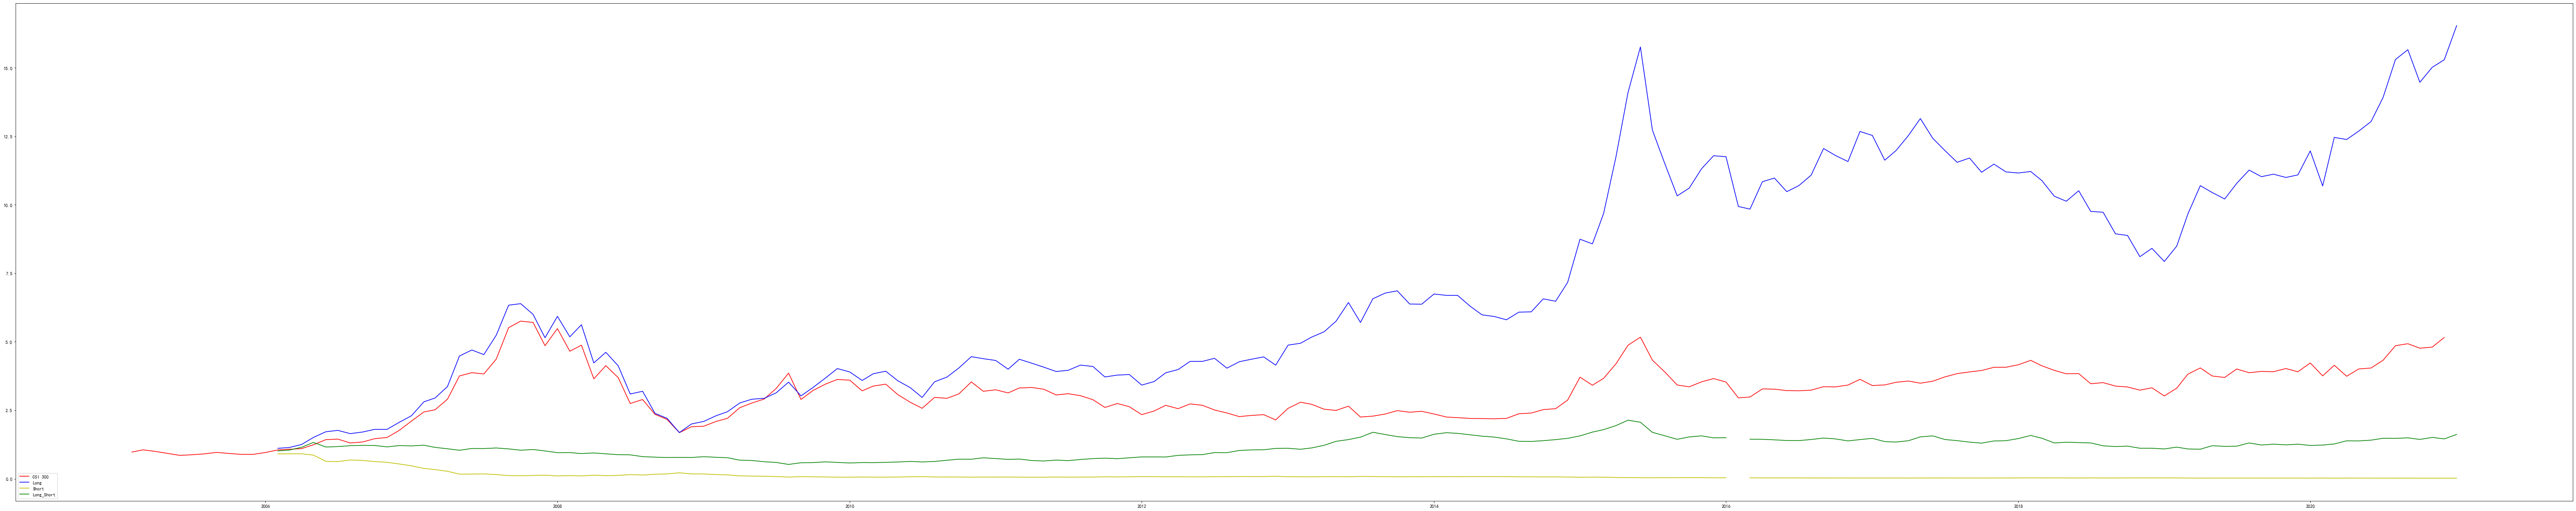

In [33]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
fig = plt.figure(figsize=(100, 20))
x=data_month.index
y1=data_month['CSI 300']
y2=data_month['long']
y3=data_month['short']
y4=data_month['long_short']
plt.plot(x, y1,'r', label='CSI 300')
plt.plot(x, y2,'b', label='Long')
plt.plot(x, y3,'y', label='Short')
plt.plot(x, y4,'g', label='Long_Short')
plt.legend(loc="lower left")
plt.show()

## Max Drawdown

In [34]:
def get_max_drawdown_slow(array):
    drawdowns = []
    for i in range(len(array)):
        max_array = max(array[:i+1])
        drawdown = (max_array - array[i])/abs(max_array)
        drawdowns.append(drawdown)
    return max(drawdowns)

In [35]:
data_month1 = data_month[(data_month.index>='2006-01-01')&(data_month.index<='2020-12-01')]

In [36]:
data_month1=data_month1.fillna(1)

In [37]:
n =  len(data_month1)//12

In [38]:
long_max_drawdown = []
for i in range(n):
    long1 = get_max_drawdown_slow(data_month1[i*12:(i+1)*12]['long'])
    long_max_drawdown.append(long1)

In [39]:
long_max_drawdown

[0.06670747075428266,
 0.19456111542878296,
 0.7158853139174626,
 0.1422683762298287,
 0.24391882797264475,
 0.14824446398036042,
 0.08180999043177793,
 0.11325760296243512,
 0.13957693287340756,
 0.3448769143059018,
 0.16279948037602768,
 0.14905860900688805,
 0.2773170339057792,
 0.04562713740594574,
 0.10684182030400054]

In [40]:
short_max_drawdown = []
for i in range(n):
    short1 = get_max_drawdown_slow(data_month1[i*12:(i+1)*12]['short'])
    short_max_drawdown.append(short1)

In [41]:
short_max_drawdown

[0.4603356989844891,
 0.7678144485460419,
 0.18925464678199982,
 0.6743377881920568,
 0.25911708614500634,
 0.1125178617565204,
 0.13653272245905979,
 0.16511667270727567,
 0.2213169015467519,
 0.4150707331973228,
 0.9748430665661847,
 0.09248127903145509,
 0.1241231499779065,
 0.2951862505668685,
 0.20398637326433844]

In [42]:
long_short_max_drawdown = []
for i in range(n):
    long_short1 = get_max_drawdown_slow(data_month1[i*12:(i+1)*12]['long_short'])
    long_short_max_drawdown.append(long_short1)

In [43]:
long_short_max_drawdown

[0.12692550807849384,
 0.17046267550269095,
 0.18793536057217616,
 0.3520173130938356,
 0.03113277819522359,
 0.11796829884367815,
 0.005172714479379188,
 0.1245926132270737,
 0.1898732667938765,
 0.32673021557997756,
 0.3318784958302015,
 0.16963013599072818,
 0.29557630861043077,
 0.06534107643804446,
 0.038791381615875385]

In [44]:
data_month1

,CSI 300,long,short,long_short
Date,,,,
2006-01-01,0.957914,1.000000,1.000000,1.000000
2006-02-01,1.051327,1.110238,0.904944,1.015182
2006-03-01,1.075122,1.137537,0.908971,1.044661
2006-04-01,1.098222,1.247544,0.910332,1.147252
2006-05-01,1.239782,1.507827,0.861782,1.325424
...,...,...,...,...
2020-08-01,4.854863,15.299768,0.019126,1.472761
2020-09-01,4.926914,15.658551,0.018929,1.492073
2020-10-01,4.763114,14.468901,0.019633,1.434194


In [45]:
get_max_drawdown_slow(data_month1['long'])

0.7365100351425495

In [46]:
get_max_drawdown_slow(data_month1['short'])

0.9811905234322392

In [47]:
get_max_drawdown_slow(data_month1['long_short'])

0.6065091920285247

In [48]:
CSI_month = []
for i in range(n):
    CSI1 = reduce(operator.mul, data_month2['CSI 300'][i*12:(i+1)*12].values, 1)
    CSI_month.append(CSI1)

In [49]:
CSI_month

[1.9806314979262751,
 2.76000911391468,
 0.39059969316990856,
 1.910106989306433,
 0.8807000388392481,
 0.8238498812509087,
 0.8162406676232081,
 1.1469701496076055,
 1.165795431430948,
 1.273735979561758,
 0.9925773228023752,
 1.1214855894863338,
 0.815617525814839,
 1.1763623069128741,
 1.3209125386474123]

In [50]:
reduce(operator.mul, CSI_month, 1)

5.803790888900839